In [ ]:
!nvidia-smi

Sat Jun 17 10:33:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 23.4 MB/s eta 0:00:00


In [ ]:
!pip install ultralytics
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.118 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/78.2 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wa1i5RBxhKJHtzTAbDkg")
project = rf.workspace("augmented-startups").project("vehicle-registration-plates-trudk")
dataset = project.version(1).download("yolov8")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=c221e8531d73d88480888c050fd1615a7ddf0ece44978aa3b665b920d2baff06
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.118, to fix: `pip install ultralytics<=8.0.20`

Extracting Dataset Version Zip to Vehicle-Registration-Plates-1 in yolov8:: 100%|██████████| 17658/17658 [00:04<00:00, 4200.20it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=200 plots=True

Ultralytics YOLOv8.0.118 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data={dataset.location}/data.yaml, epochs=50, patience=50, batch=16, imgsz=100, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dyna

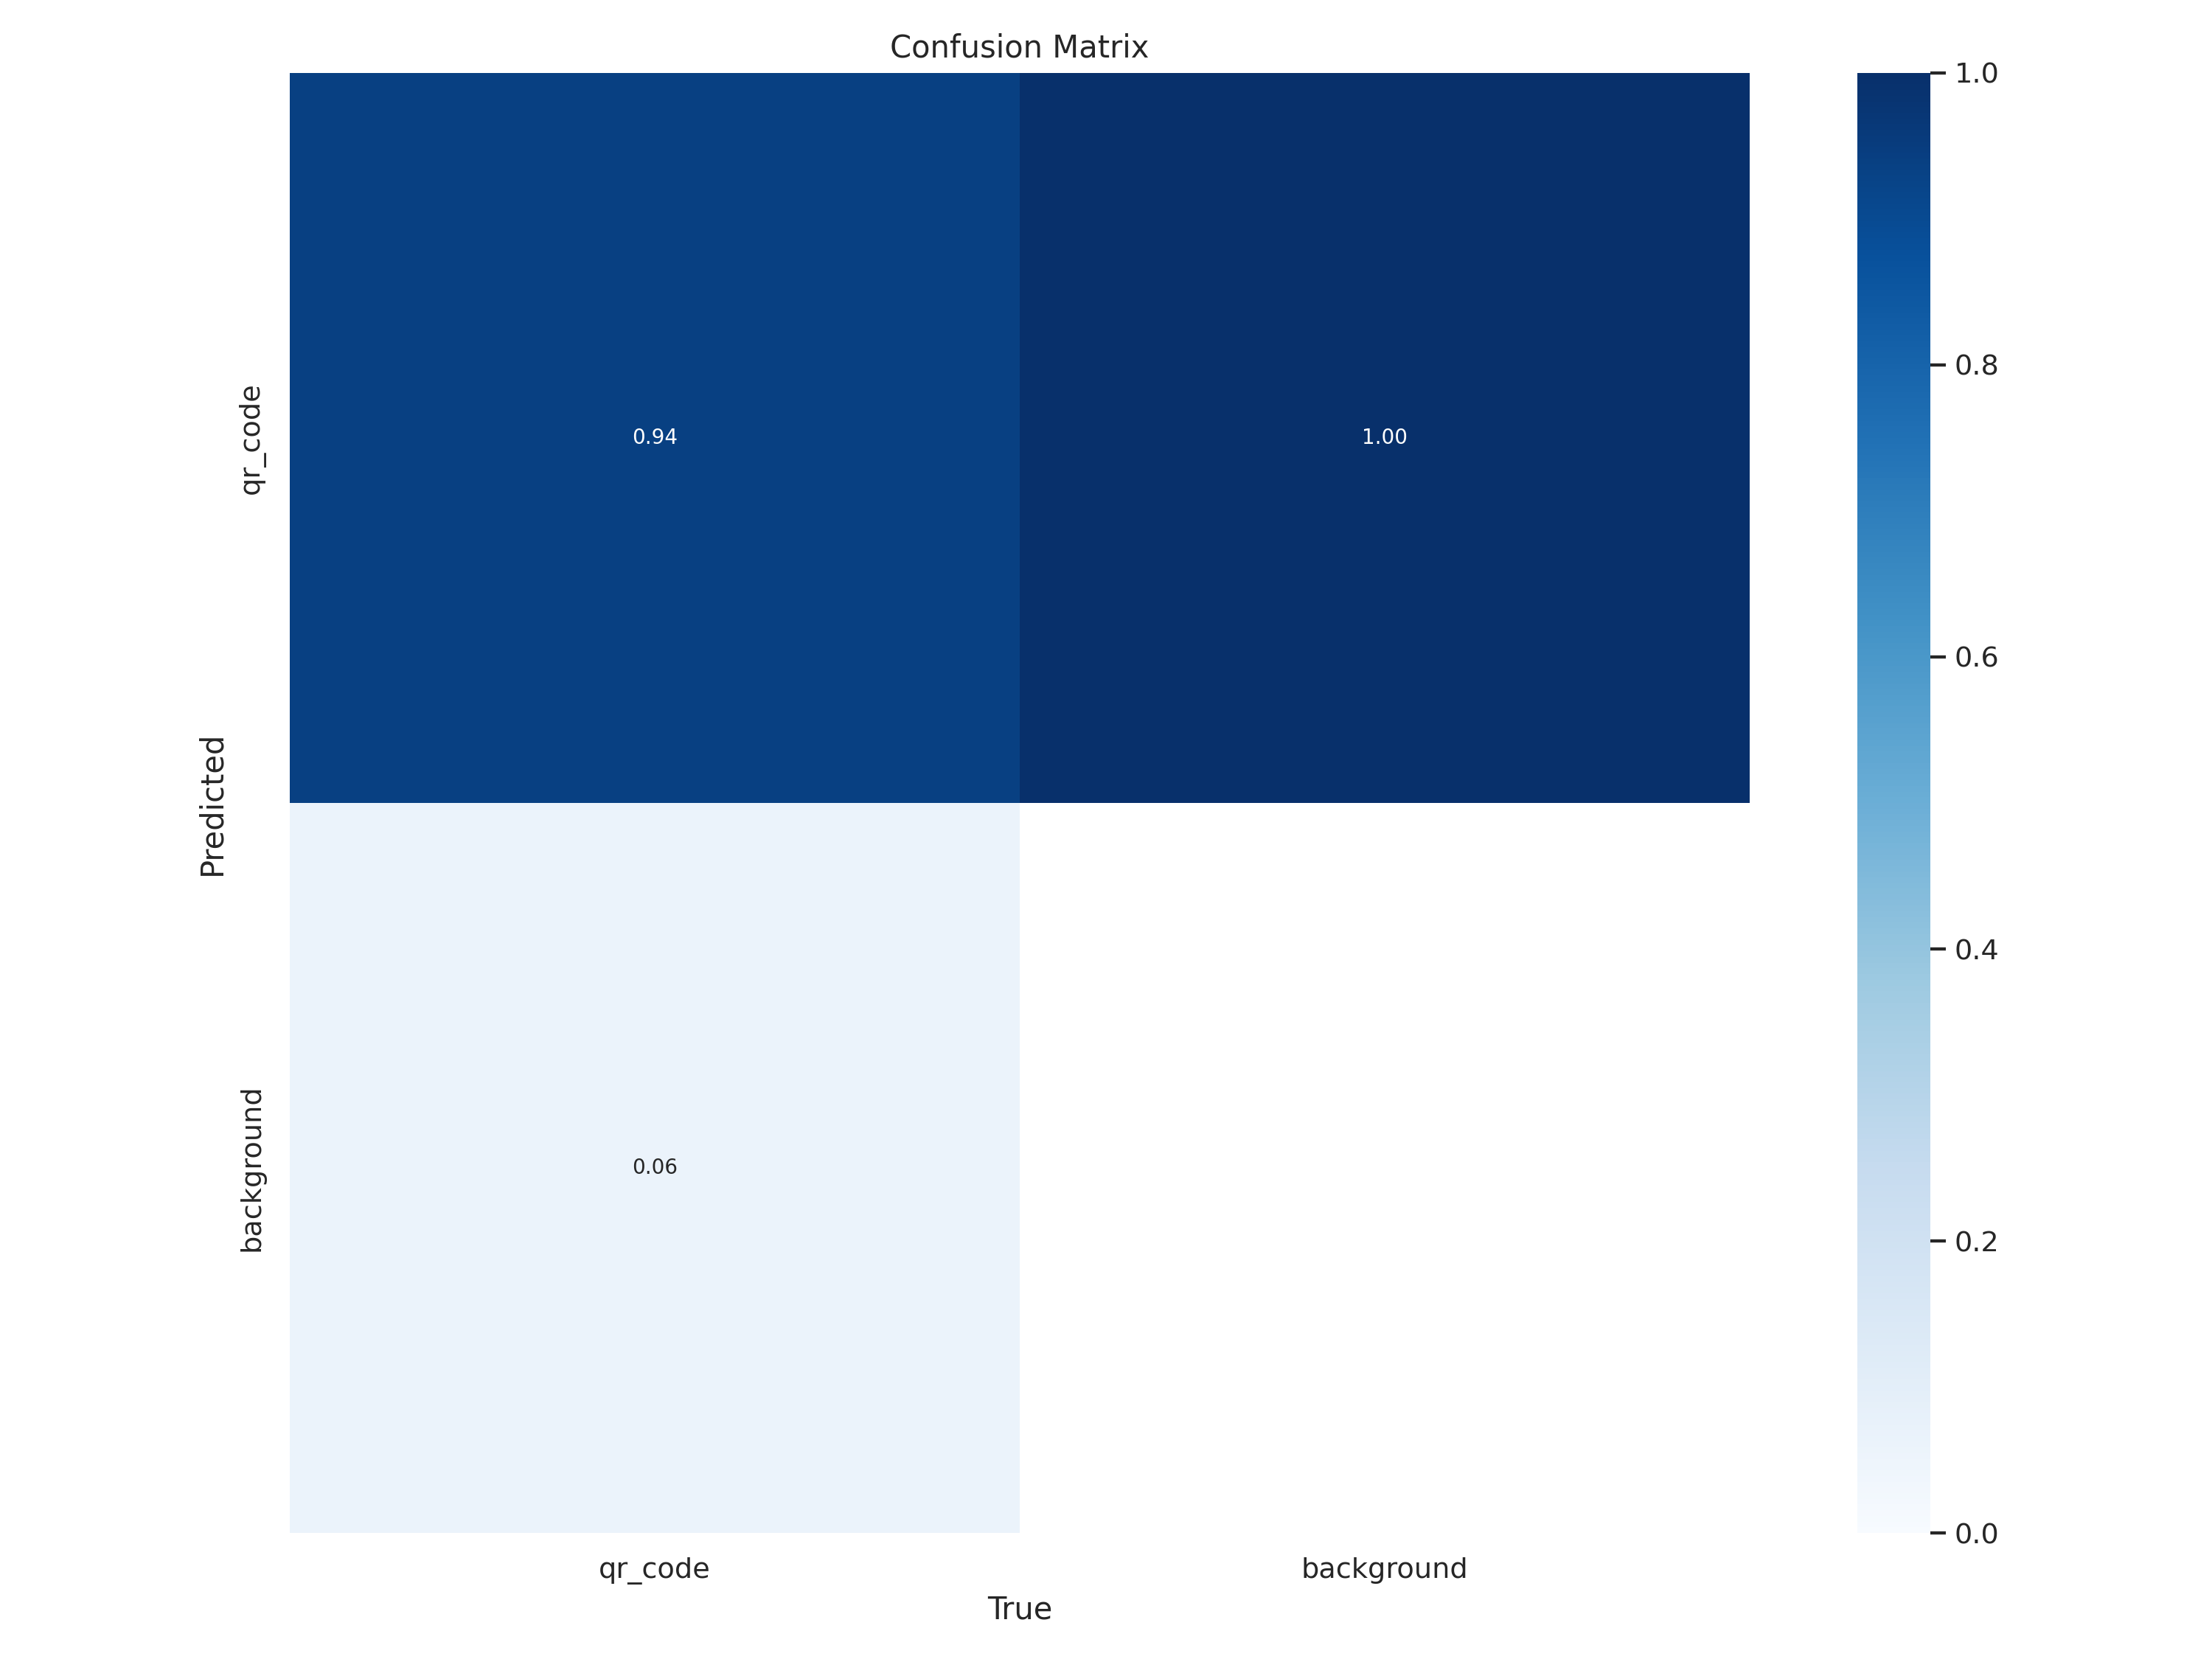

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

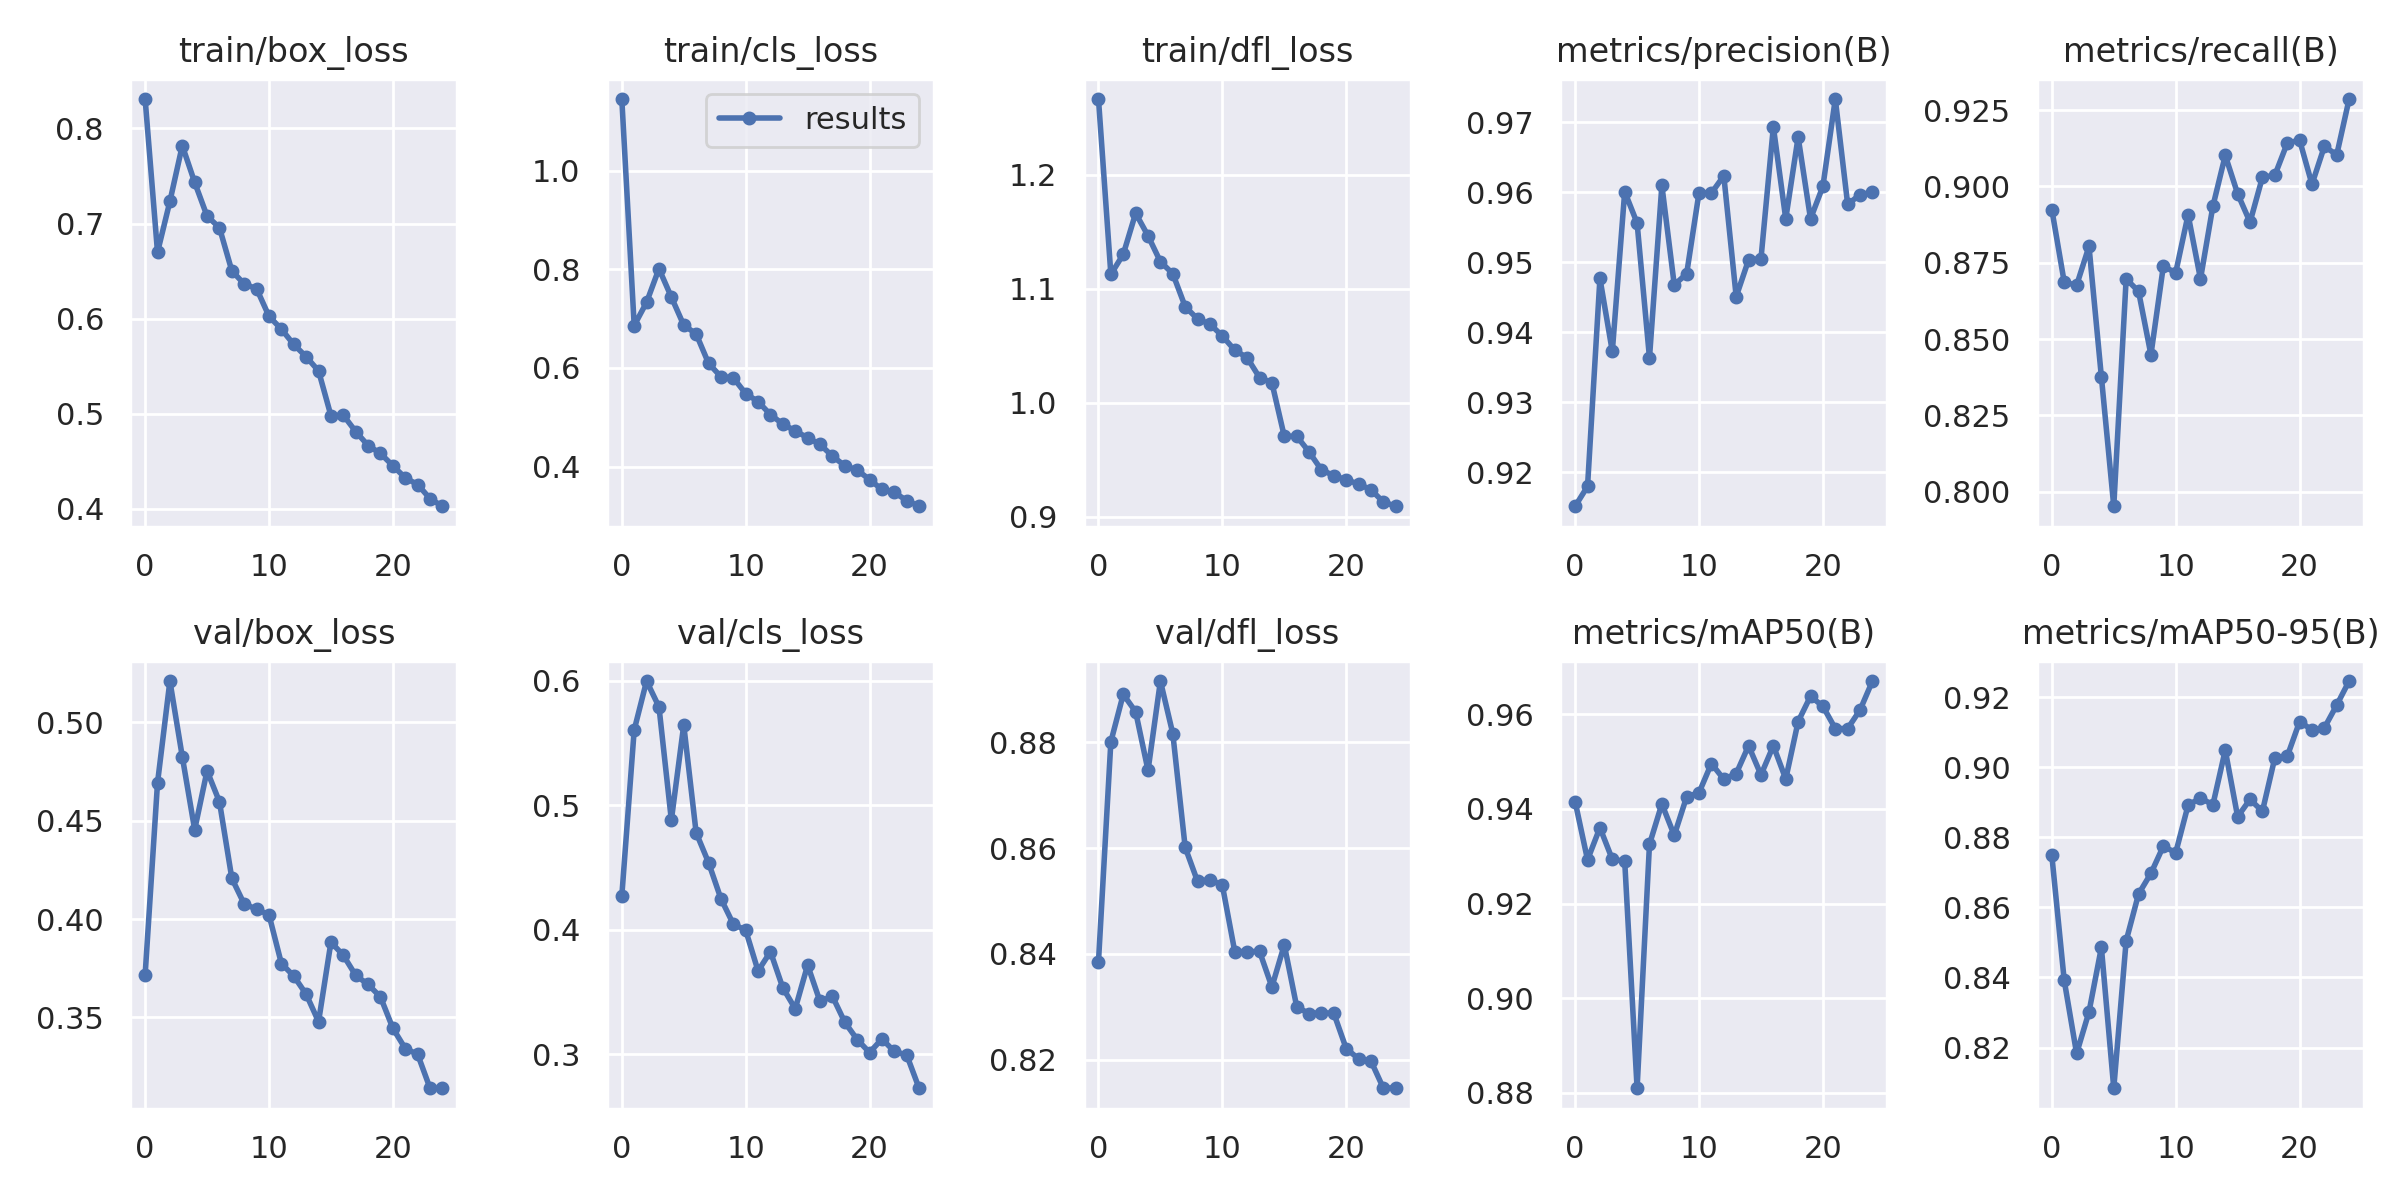

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

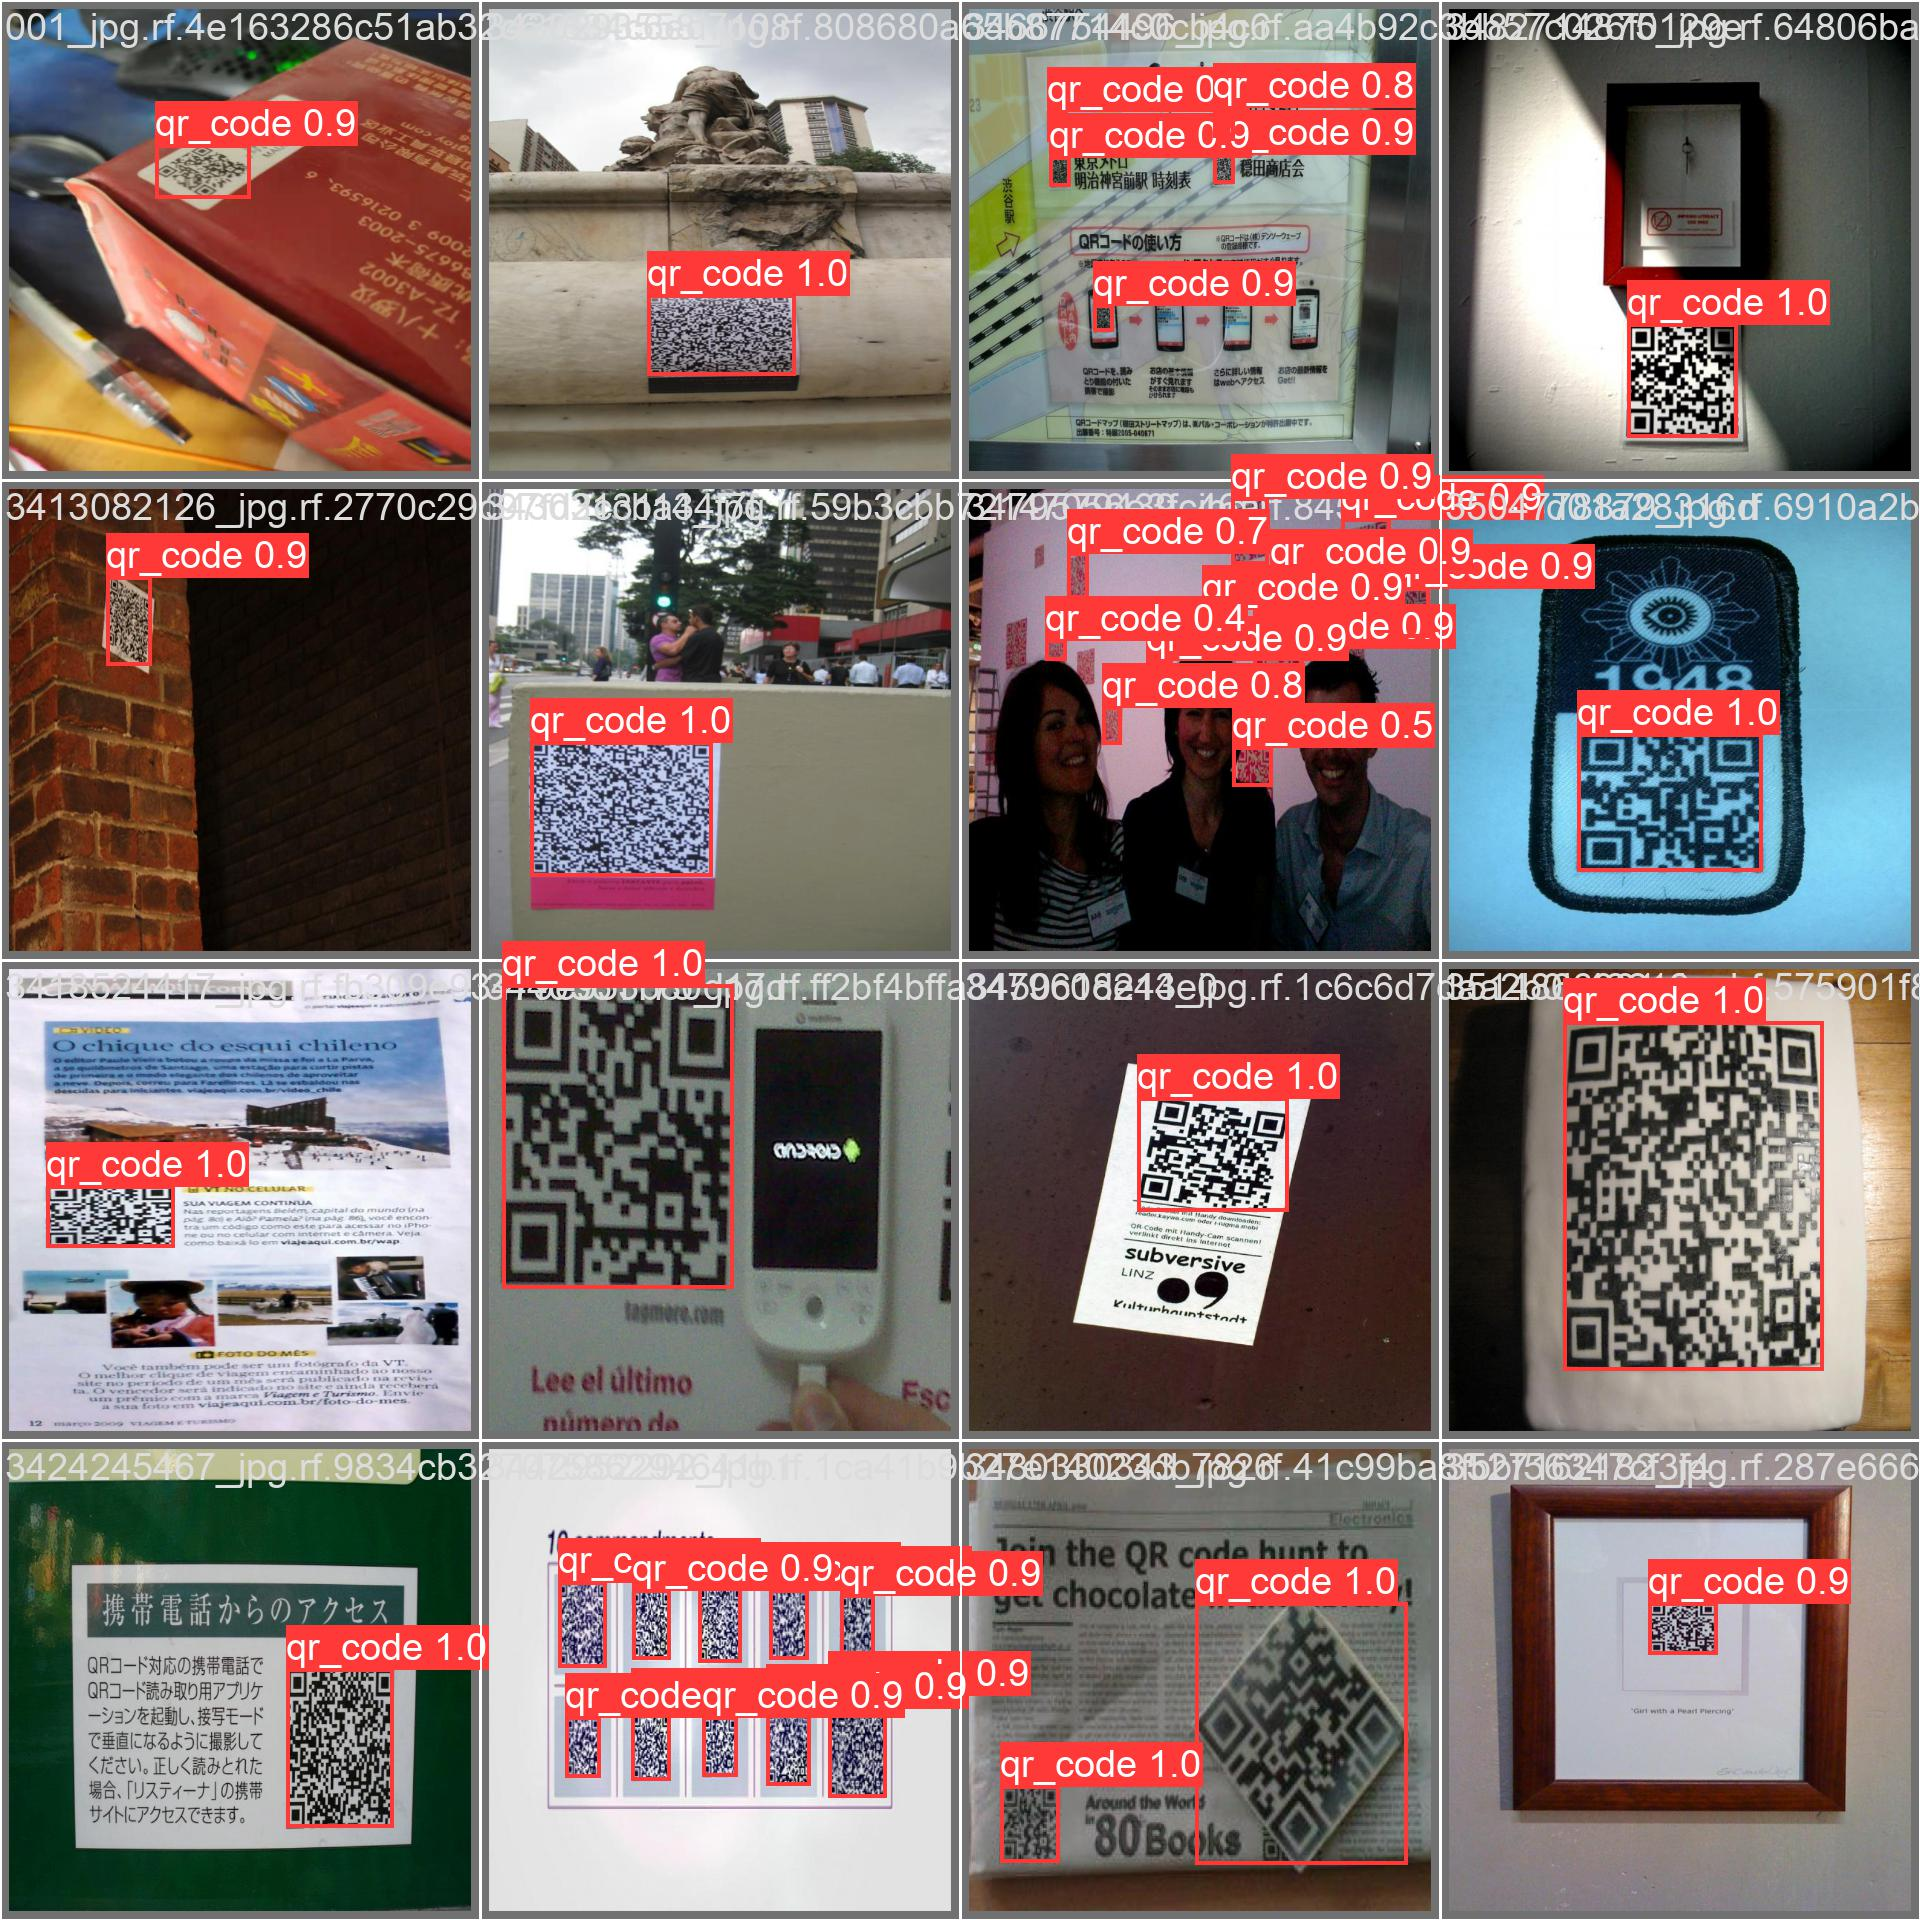

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/xcerno30-QR-codes-20/valid/labels.cache... 607 images, 0 backgrounds, 0 corrupt: 100% 607/607 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 38/38 [00:30<00:00,  1.26it/s]
                   all        607        967       0.96      0.929      0.967      0.925
Speed: 1.3ms preprocess, 38.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/305 /content/xcerno30-QR-codes-20/test/images/001_jpg.rf.9bd5f235fcaf84fa6b03846fc4648c41.jpg: 800x800 1 qr_code, 58.7ms
image 2/305 /content/xcerno30-QR-codes-20/test/images/003_jpg.rf.ddd05fe95f65f5a2b4c86dd490fe0e38.jpg: 800x800 1 qr_code, 54.7ms
image 3/305 /content/xcerno30-QR-codes-20/test/images/0200_jpg.rf.6465c7f0f7ffa80a98b89b039149b4b1.jpg: 800x800 1 qr_code, 50.6ms
image 4/305 /content/xcerno30-QR-codes-20/test/images/02011_jpg.rf.3b233467d6766508716d662e4a0e2bbd.jpg: 800x800 1 qr_code, 37.0ms
image 5/305 /content/xcerno30-QR-codes-20/test/images/02012_jpg.rf.d1eaa67be86024bcd58ac1c1b2b68a5b.jpg: 800x800 1 qr_code, 37.4ms
image 6/305 /content/xcerno30-QR-codes-20/test/images/02013_jpg.rf.0f52fb308c701bbdbe4b9dad64c68de1.jpg: 800x800 1 qr_code, 38.4ms
image 7/305 /content/xcerno30-QR-codes-20/test/ima

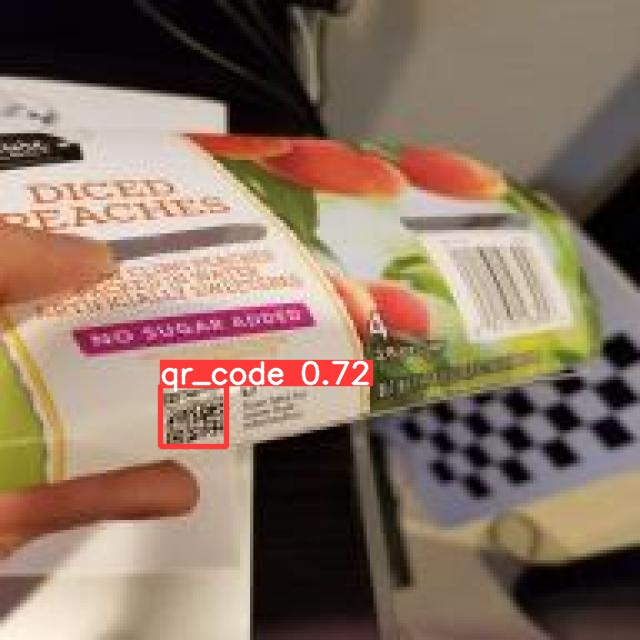

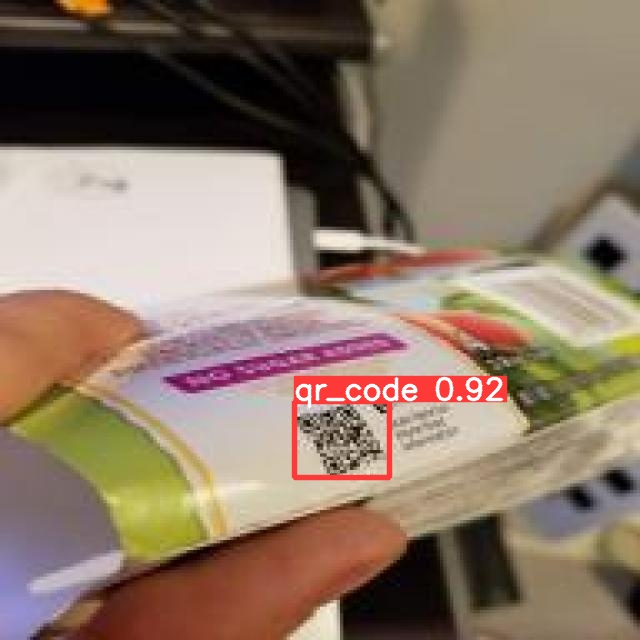

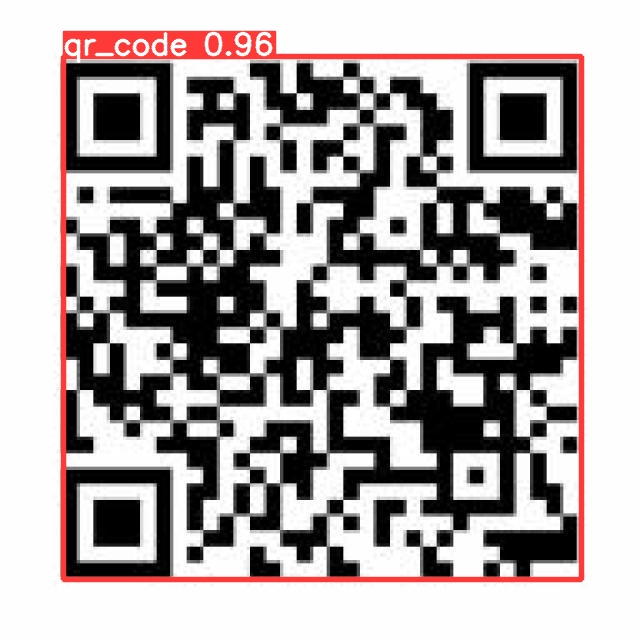

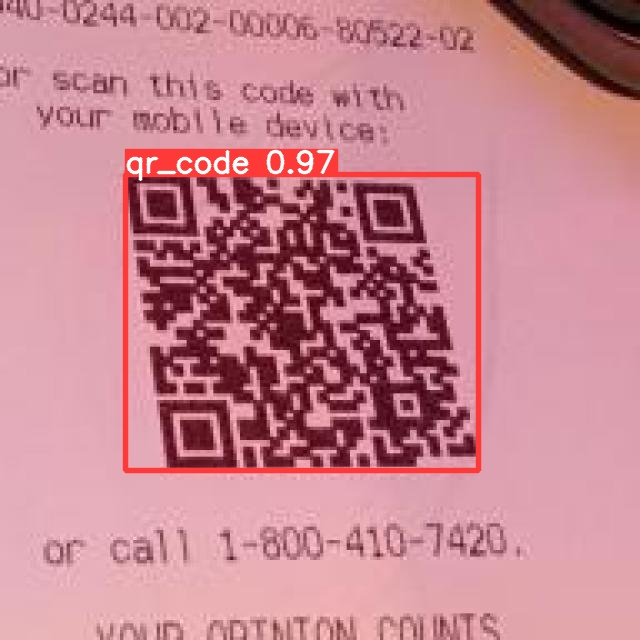

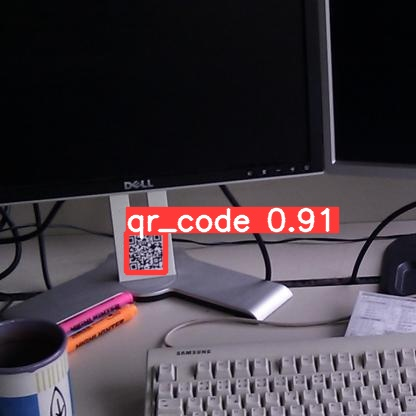

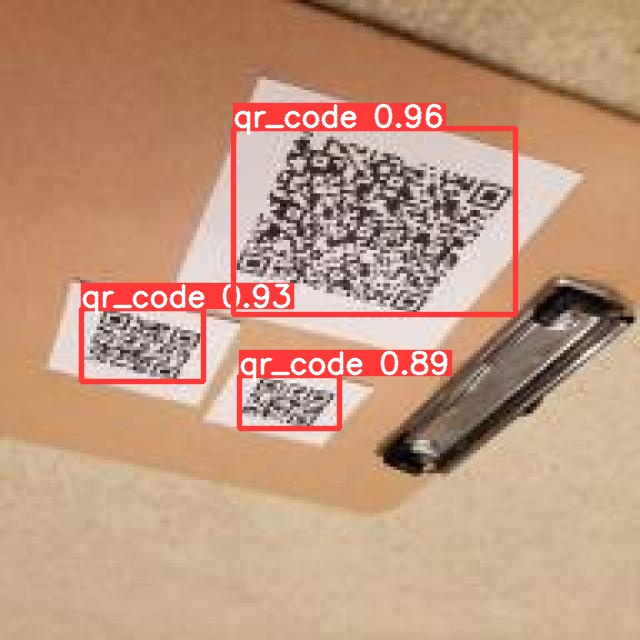

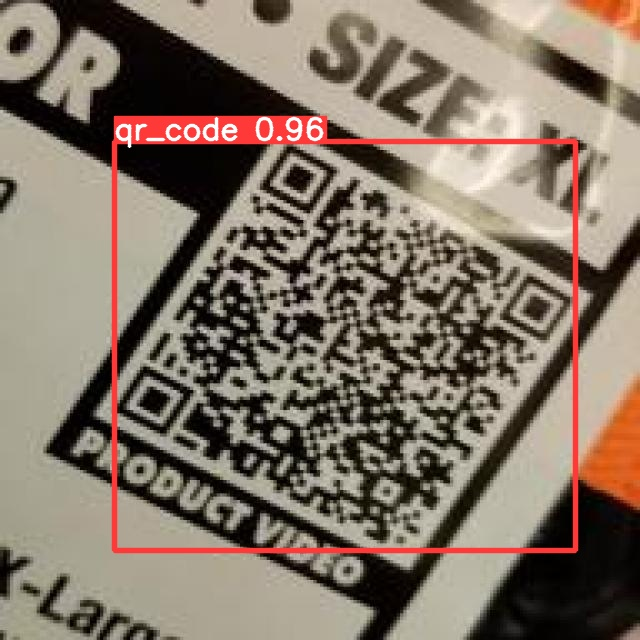

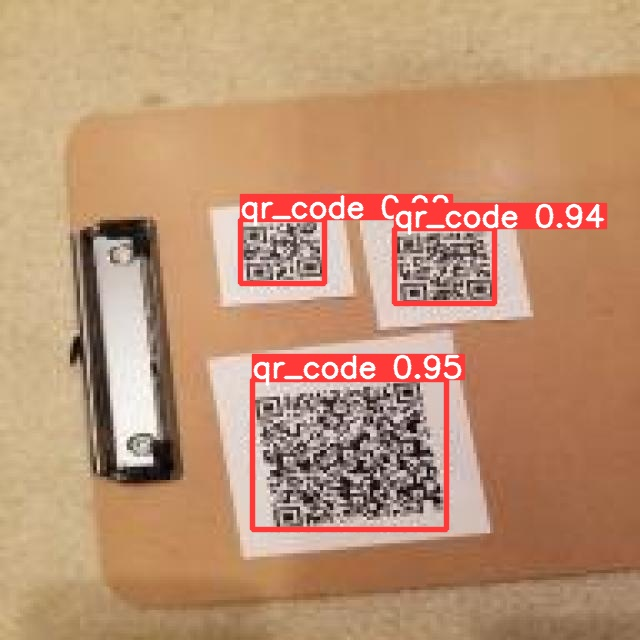

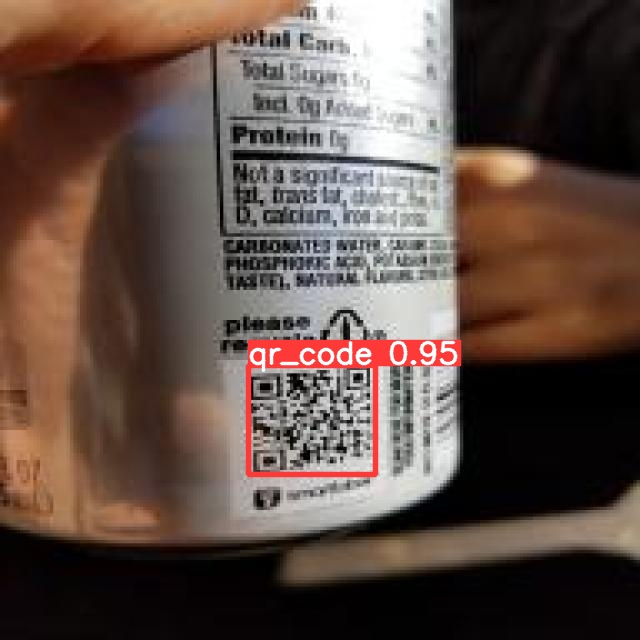

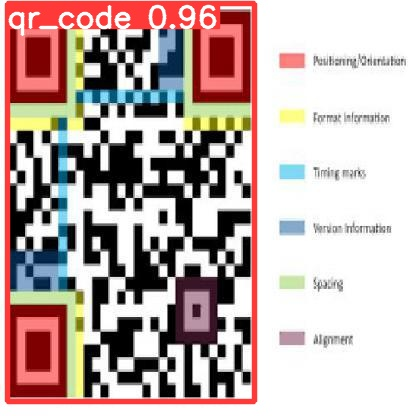

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")